In [1]:
from scipy.io import loadmat
import pandas as pd
import math
import numpy as np
from matplotlib.pyplot import subplots,scatter
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
sc_data_30k = pd.read_pickle('../data/30k_data.pkl')
ICC_df = pd.read_pickle('../data/ICC_rms.pkl')

In [3]:
tolerance = 0.05
sc_data_30k_icc = []
common_feature = []
for icc_feature in ICC_df.columns[:-1]:
    features = sc_data_30k.columns.values[:-1][abs(icc_feature-sc_data_30k.columns.values[:-1]) < 0.1]
    if len(features>0):
        feature_selected = features[sc_data_30k[features].sum()==sc_data_30k[features].sum().max()]
        sc_data_30k_icc.append(sc_data_30k[feature_selected])      
        common_feature.append(icc_feature)
        print(icc_feature,feature_selected)
sc_data_30k_icc = pd.concat(sc_data_30k_icc,axis=1)
icc_new = ICC_df[common_feature]
icc_new['type'] = ICC_df['type']

510.28 [510.1801]
511.32 [511.2759]
512.29 [512.2794]
513.32 [513.2914]
514.32 [514.2956]
515.32 [515.3106]
518.35 [518.3269]
519.3 [519.3301]
521.19 [521.1419]
522.39 [522.3604]
523.05 [523.0209]
523.38 [523.3644]
524.41 [524.3759]
525.4 [525.379]
527.29 [527.2726]
529.19 [529.1362]
531.33 [531.3015]
533.27 [533.2599]
534.29 [534.2996]
537.99 [537.9774]
538.34 [538.4293]
539.0 [538.9849]
539.27 [539.2115]
541.3 [541.2593]
542.32 [542.2626]
543.22 [543.154]
544.03 [543.9938]
544.35 [544.341]
545.05 [545.0015]
546.06 [546.0046]
546.37 [546.3562]
547.33 [547.3599]
551.06 [551.0176]
552.06 [552.0221]
553.33 [553.2843]
559.36 [559.3304]
560.36 [560.3343]
561.29 [561.2843]
565.35 [565.3668]
566.36 [566.3701]
567.01 [566.9907]
569.35 [569.2787]
570.37 [570.3418]
575.35 [575.3402]
576.39 [576.3473]
577.4 [577.3548]
578.4 [578.3591]
579.37 [579.3998]
580.4 [580.362]
581.38 [581.3114]
582.36 [582.3152]
584.33 [584.2762]
585.34 [585.2806]
587.36 [587.3241]
589.35 [589.2562]
591.34 [591.2716]
593

C:\Users\Richard\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


In [4]:
sc_data_30k_icc.columns = common_feature

In [5]:
sc_data_30k_icc.head()

,510.28,511.32,512.29,513.32,514.32,515.32,518.35,519.30,521.19,522.39,...,837.60,866.60,870.61,871.58,913.53,916.53,932.60,933.55,958.61,991.74
x_10011y_23235.d,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.075719,0.0,0.0,0.0,0.0,0.0,0.0
x_10014y_15204.d,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
x_10015y_12885.d,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
x_10017y_4857.d,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
x_10020y_20683.d,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
import xgboost
from sklearn.metrics import classification_report 

from sklearn.externals import joblib
model = joblib.load('xgb_best.sav')

model.fit(icc_new.drop('type',1).values,icc_new['type'].values)

C:\Users\Richard\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6, gamma=1,
              learning_rate=0.1, max_delta_step=0, max_depth=7,
              min_child_weight=1, missing=nan, n_estimators=600, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0.01, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [7]:
y_pred_30k = model.predict(sc_data_30k_icc.values)
prob_30k = model.predict_proba(sc_data_30k_icc.values)

C:\Users\Richard\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  # Remove the CWD from sys.path while we load stuff.


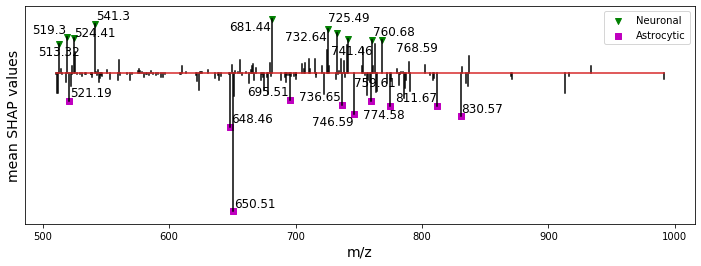

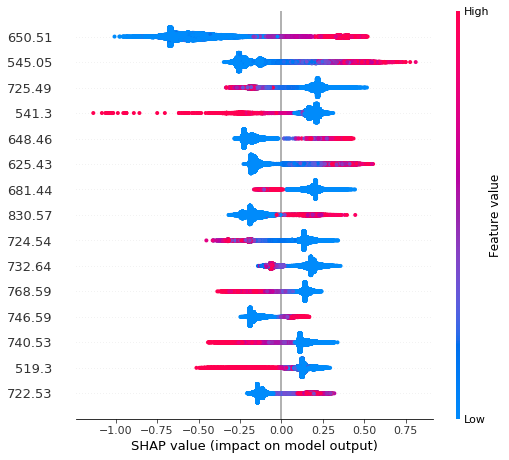

In [8]:
import shap
from adjustText import adjust_text
def feature_contrib(model,X,features,feature_num_shown,if_summary):
    
    shap_explainer = shap.TreeExplainer(model)
    shap_vals = shap_explainer.shap_values(X)
    
    fig1,axes = subplots(figsize=(12,4))
    
    g=axes.stem([float(x) for x in features],shap_vals.mean(axis=0),markerfmt=' ',linefmt='k')
    axes.get_yaxis().set_ticks([])
    shap_vals_index_ranked = np.argsort(shap_vals.mean(axis=0))[::-1]
    shap_vals_ranked = shap_vals.mean(axis=0)[shap_vals_index_ranked]
    #axes.spines['right'].set_visible(False)
    #axes.spines['top'].set_visible(False)
    texts = []
    axes.scatter(features[shap_vals_index_ranked[:feature_num_shown]],shap_vals_ranked[:feature_num_shown],color='g',s=35,marker='v',label='Neuronal')
    axes.scatter(features[shap_vals_index_ranked[-feature_num_shown:]],shap_vals_ranked[-feature_num_shown:],color='m',s=35,marker='s',label='Astrocytic')
    for i in range(feature_num_shown):
        texts.append(plt.text(float(features[shap_vals_index_ranked[i]]),shap_vals_ranked[i],float(features[shap_vals_index_ranked[i]]),fontsize=12))
        texts.append(plt.text(float(features[shap_vals_index_ranked[-i-1]]),shap_vals_ranked[-i-1],float(features[shap_vals_index_ranked[-i-1]]),fontsize=12))

#         axes.annotate(format(float(features[shap_vals_index_ranked[i]]),'.2f'), xy=(float(features[shap_vals_index_ranked[i]]),shap_vals_ranked[i]),fontsize=10)
#         axes.annotate(format(float(features[shap_vals_index_ranked[-i-1]]),'.2f'), xy=(float(features[shap_vals_index_ranked[-i-1]]),shap_vals_ranked[-i]),fontsize=10)
    axes.set_xlabel('m/z',fontsize=14)
    axes.set_ylabel('mean SHAP values',fontsize=14)
    axes.legend(['Neuronal','Astrocytic'])
    adjust_text(texts)
    if if_summary:
        fig2,axes = subplots(figsize=(12,4))
        shap.summary_plot(shap_vals,X,max_display=15)
    return fig1,fig2,shap_vals



f1,f2,contrib_xgb_best = feature_contrib(model,sc_data_30k_icc,
                                             np.array(common_feature),10,True)

In [10]:
f1.savefig('contribution_plot_30k.png',dpi=300)
f2.savefig('shap_plot_30k.png',dpi=300)

In [9]:
from matplotlib.lines import Line2D
from sklearn.decomposition import PCA
shap_pca50 = PCA(n_components=2).fit_transform(contrib_xgb_best)

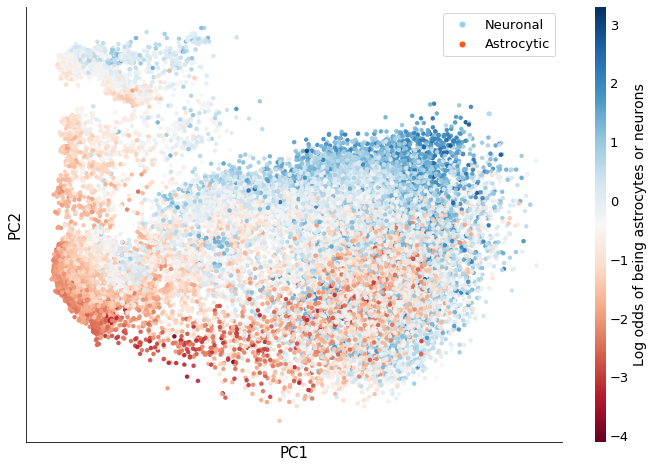

In [10]:
f2,axes= subplots(1,1,figsize=(12,8))
plt.scatter(shap_pca50[:,0],
       shap_pca50[:,1],s=20,
       c=contrib_xgb_best.sum(1).astype(np.float64),
       linewidth=0, alpha=0.9, cmap='RdBu')
cb = plt.colorbar(aspect=40, orientation="vertical")
cb.set_label(label="Log odds of being astrocytes or neurons",fontsize=14)
cb.set_alpha(1)
cb.draw_all()
cb.outline.set_linewidth(0)
cb.ax.tick_params('y', length=0, labelsize=13)
cb.ax.xaxis.set_ticks_position("top")
cb.ax.xaxis.set_label_position('bottom')
axes.spines['right'].set_visible(False)
axes.spines['top'].set_visible(False)
axes.get_yaxis().set_ticks([])
axes.get_xaxis().set_ticks([])
custom_lines = [Line2D([0], [0], alpha=0.9,marker='o', color='w', label='Scatter',
                          markerfacecolor='skyblue', markersize=7),
                Line2D([0], [0], alpha=0.9,marker='o', color='w', label='Scatter',
                          markerfacecolor='orangered', markersize=7)]

axes.legend(custom_lines, ['Neuronal','Astrocytic'],fontsize=13)
axes.set_xlabel('PC1',fontsize=15)
axes.set_ylabel('PC2',fontsize=15)
plt.show()

In [11]:
f2.savefig('pca_SHAP_prob_30k.png',dpi=300)

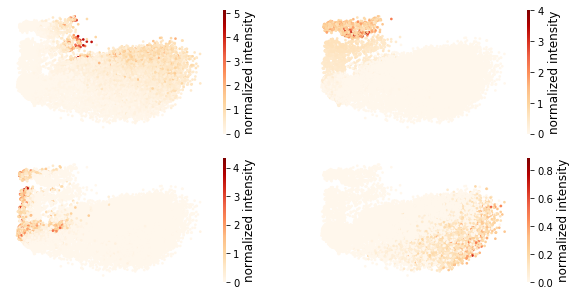

In [16]:
FOI = [545.05,650.51,724.54,768.59]
row_plot = int(np.ceil(len(FOI)/2))
f,axes = subplots(2,2,figsize=(10,5))
ax = axes.ravel()
index = 0
for feature in FOI:
    fig=ax[index].scatter(shap_pca50[:,0],
               shap_pca50[:,1],
               c=sc_data_30k_icc[feature].values[:100000].astype(np.float64),
               linewidth=0, alpha=1, cmap='OrRd',s=7)
    cb=plt.colorbar(fig, aspect=40, orientation="vertical",ax=ax[index])
    cb.set_alpha(1)
    cb.set_label(label='normalized intensity',size=12)
    cb.draw_all()
    cb.outline.set_linewidth(0)
    cb.ax.tick_params('x', length=0)
    cb.ax.xaxis.set_label_position('top')
    #ax[index].set_title(format(float(feature),'.2f')+' m/z',fontsize=15)
    ax[index].axis("off")
    index += 1
f.savefig('SHAP_features_30k.png',dpi=300)